# AAut lab question 1 part 1
### Linear regression with outliers

 Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Load training data

In [2]:
# Importing the datasets
dataX = np.load('X_train.npy')
dataY = np.load('Y_train.npy')
testX = np.load('X_test.npy')

Q1 = np.quantile(dataY, 0.25)
Q3 = np.quantile(dataY, 0.75)
IQR = Q3 - Q1
outliers = dataY < (Q1 - 1.5 * IQR)
outliers = outliers | (dataY > (Q3 + 1.5 * IQR))
#dataY[outliers] = 0
#dataX[outliers] = 0
#testX[outliers] = 0

Plot the data for visual representation

C:\Users\tomas\AppData\Local\Temp\ipykernel_25412\1331763788.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


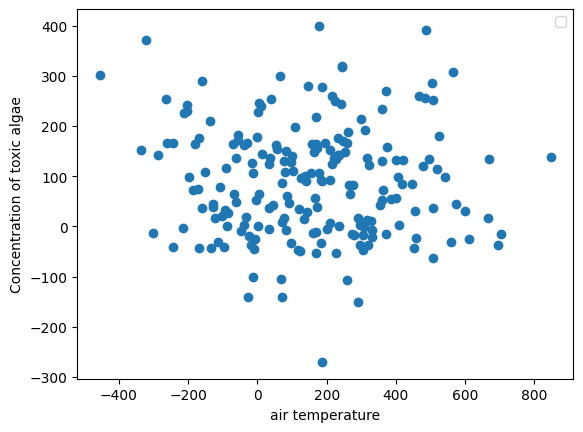

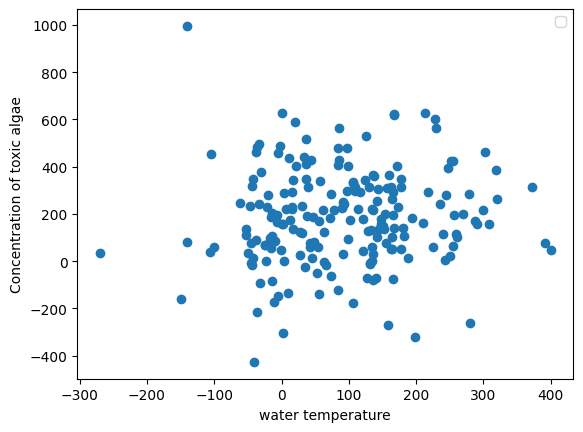

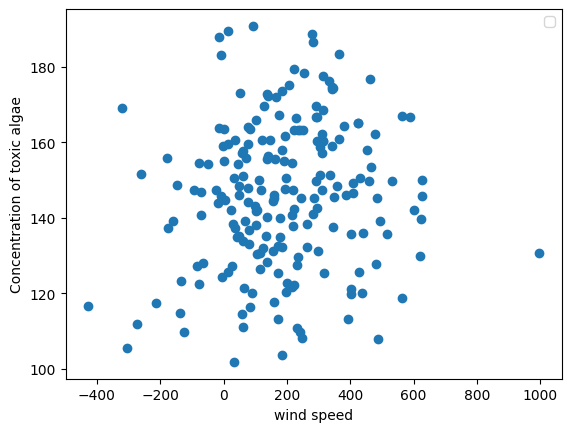

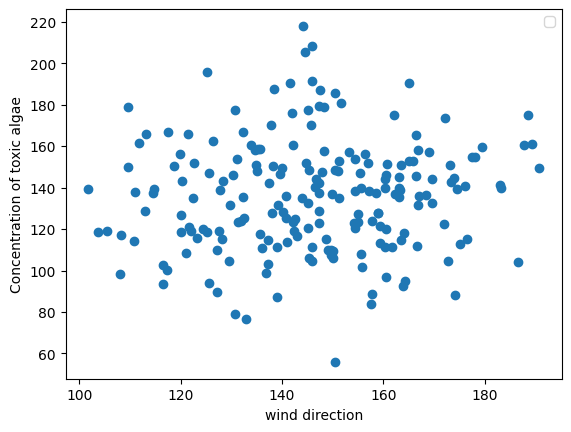

In [21]:
parameters = np.array(["air temperature", "water temperature", "wind speed", "wind direction", "illumination"])
for i in range(5):
    plot = plt.figure(i)
    plt.plot(dataX[:,i], dataY, 'o')
    #plt.axhline(y=np.max(dataY[outliers]), color='r', linestyle='--', label='Max Outlier')
    #plt.axhline(y=np.min(dataY[outliers]), color='b', linestyle='--', label='Min Outlier')
    plt.legend()
    plt.plot()
    plt.xlabel(parameters[i])
    plt.ylabel("Concentration of toxic algae")

Calculate SSE

In [4]:
def calculate_SSE(MSE, N):
  # Calculate the sum of squared errors
  SSE = MSE * N 
  return SSE

Create linear regression model

In [5]:
def create_model_LinearRegression(X, Y):
    # Create a linear regression model
    model = LinearRegression()
    # Fit the model to the data
    model.fit(X, Y)
    return model

Create Lasso model

In [6]:
def create_model_Lasso(X, Y, alpha):
    # Create a Lasso model
    model = Lasso(alpha=alpha)
    # Fit the model to the data
    model.fit(X, Y)
    return model

Create Ridge model

In [7]:
def create_model_Ridge(X, Y, alpha):
    # Create a Ridge model
    model = Ridge(alpha=alpha)
    # Fit the model to the data
    model.fit(X, Y)
    return model

Create ElasticNet model

In [8]:
def create_model_ElasticNet(X, Y, alpha, l1_ratio):
    # Create a ElasticNet model
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    # Fit the model to the data
    model.fit(X, Y)
    return model

Create BayesianRidge model

In [9]:
def create_model_BayesianRidge(X, Y):
    # Create a BayesianRidge model
    model = BayesianRidge()
    # Fit the model to the data
    model.fit(X, Y)
    return model

Create LassoLars model

In [10]:
def create_model_LassoLars(X, Y):
    # Create a LassoLars model
    model = LassoLars()
    # Fit the model to the data
    model.fit(X, Y)
    return model

Create RANSAC model

In [11]:
def create_model_RANSACRegressor(X, Y):
    # Create a RANSACRegressor model
    model = RANSACRegressor()
    # Fit the model to the data
    model.fit(X, Y)
    return model

Create Theil-Sen model

In [12]:
def create_model_TheilSenRegressor(X, Y):
    # Create a TheilSenRegressor model
    model = TheilSenRegressor()
    # Fit the model to the data
    model.fit(X, Y)
    return model

Create Huber model

In [13]:
def create_model_HuberRegressor(X, Y):
    # Create a HuberRegressor model
    model = HuberRegressor()
    # Fit the model to the data
    model.fit(X, Y)
    return model

Predict the test data with the model

In [14]:
reg_Ridge = RidgeCV(alphas=np.logspace(-6, 6, 13)).fit(dataX, dataY)
reg_Lasso = LassoCV(cv=5, random_state=0).fit(dataX, dataY)
regLassoLars = LassoLarsCV(cv=5).fit(dataX, dataY)
reg_ElasticNet = ElasticNetCV(cv=5, random_state=0).fit(dataX, dataY)

# Create the models
model_LinearRegression = create_model_LinearRegression(dataX, dataY)
model_Lasso = create_model_Lasso(dataX, dataY, reg_Lasso.alpha_) # reg_LassoLars.alpha_
model_Ridge = create_model_Ridge(dataX, dataY, reg_Ridge.alpha_)
model_ElasticNet = create_model_ElasticNet(dataX, dataY, reg_ElasticNet.alpha_, reg_ElasticNet.l1_ratio_)
model_BayesianRidge = create_model_BayesianRidge(dataX, dataY)
model_LassoLars = create_model_LassoLars(dataX, dataY)
model_RANSACRegressor = create_model_RANSACRegressor(dataX, dataY)
model_TheilSenRegressor = create_model_TheilSenRegressor(dataX, dataY)
model_HuberRegressor = create_model_HuberRegressor(dataX, dataY)

# Predict the values for the test set
predY_LinearRegression = model_LinearRegression.predict(testX)
predY_Lasso = model_Lasso.predict(testX)
predY_Ridge = model_Ridge.predict(testX)
predY_ElasticNet = model_ElasticNet.predict(testX)
predY_BayesianRidge = model_BayesianRidge.predict(testX)
predY_LassoLars = model_LassoLars.predict(testX)
predY_RANSACRegressor = model_RANSACRegressor.predict(testX)
predY_TheilSenRegressor = model_TheilSenRegressor.predict(testX)
predY_HuberRegressor = model_HuberRegressor.predict(testX)

c:\Users\tomas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6910641370277517, tolerance: 0.39510481404191045
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\tomas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0785987901276712, tolerance: 0.39510481404191045
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\tomas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.138811828283451, tolerance: 0.39510481404191045
  model = cd_fast.enet_coordinate_descent_gr

In [23]:
# Retrieve the coefficients (betas) from the RANSAC model
print("RANSAC coefficients: ", model_RANSACRegressor.estimator_.coef_)
print("RANSAC intercept: ", model_RANSACRegressor.estimator_.intercept_)

print("TheilSen coefficients: ", model_TheilSenRegressor.coef_)
print("TheilSen intercept: ", model_TheilSenRegressor.intercept_)

print("Huber coefficients: ", model_HuberRegressor.coef_)
print("Huber intercept: ", model_HuberRegressor.intercept_)
# Calculate Mean Squared Error (MSE)
mse_LinearRegression = mean_squared_error(dataY, predY_LinearRegression)
mse_Lasso = mean_squared_error(dataY, predY_Lasso)
mse_Ridge = mean_squared_error(dataY, predY_Ridge)
mse_ElasticNet = mean_squared_error(dataY, predY_ElasticNet)
mse_BayesianRidge = mean_squared_error(dataY, predY_BayesianRidge)
mse_LassoLars = mean_squared_error(dataY, predY_LassoLars)
mse_RANSACRegressor = mean_squared_error(dataY, predY_RANSACRegressor)
mse_TheilSenRegressor = mean_squared_error(dataY, predY_TheilSenRegressor)
mse_HuberRegressor = mean_squared_error(dataY, predY_HuberRegressor)

RANSAC coefficients:  [-0.00451637 -0.00397777 -0.00186925 -0.00013363 -0.00723121]
RANSAC intercept:  1.5603690124508738
TheilSen coefficients:  [-0.00498179 -0.00630686 -0.00177739 -0.00092911  0.00281816]
TheilSen intercept:  0.5969056963770402
Huber coefficients:  [-0.00521794 -0.00735042 -0.00180203 -0.00017723  0.00727062]
Huber intercept:  -0.0020086785203862084


In [16]:

# Calculate the sum of squared errors
SSE_LinearRegression = calculate_SSE(mse_LinearRegression, len(dataY))
print("SSE Linear Regression: ", SSE_LinearRegression)
SSE_Lasso = calculate_SSE(mse_Lasso, len(dataY))
print("SSE Lasso: ", SSE_Lasso)
SSE_Ridge = calculate_SSE(mse_Ridge, len(dataY))
print("SSE Ridge: ", SSE_Ridge)
SSE_ElasticNet = calculate_SSE(mse_ElasticNet, len(dataY))
print("SSE ElasticNet: ", SSE_ElasticNet)
SSE_BayesianRidge = calculate_SSE(mse_BayesianRidge, len(dataY))
print("SSE BayesianRidge: ", SSE_BayesianRidge)
SSE_LassoLars = calculate_SSE(mse_LassoLars, len(dataY))
print("SSE LassoLars: ", SSE_LassoLars)
SSE_RANSACRegressor = calculate_SSE(mse_RANSACRegressor, len(dataY))
print("SSE RANSACRegressor: ", SSE_RANSACRegressor)
SSE_TheilSenRegressor = calculate_SSE(mse_TheilSenRegressor, len(dataY))
print("SSE TheilSenRegressor: ", SSE_TheilSenRegressor)
SSE_HuberRegressor = calculate_SSE(mse_HuberRegressor, len(dataY))
print("SSE HuberRegressor: ", SSE_HuberRegressor)

SSE Linear Regression:  5004.041636672411
SSE Lasso:  5012.816351691339
SSE Ridge:  5081.653069882007
SSE ElasticNet:  5014.765444801781
SSE BayesianRidge:  5168.758171020247
SSE LassoLars:  5052.120785798501
SSE RANSACRegressor:  6482.011784816179
SSE TheilSenRegressor:  6450.687765848695
SSE HuberRegressor:  6473.1638973625695


Visualize model prediction

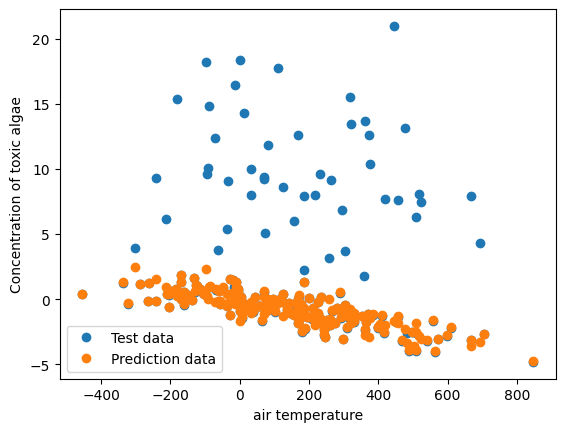

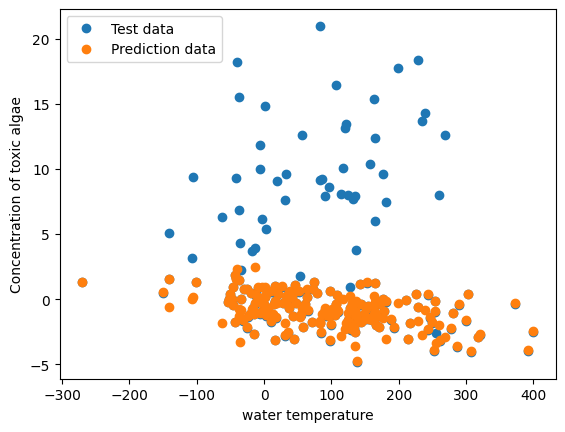

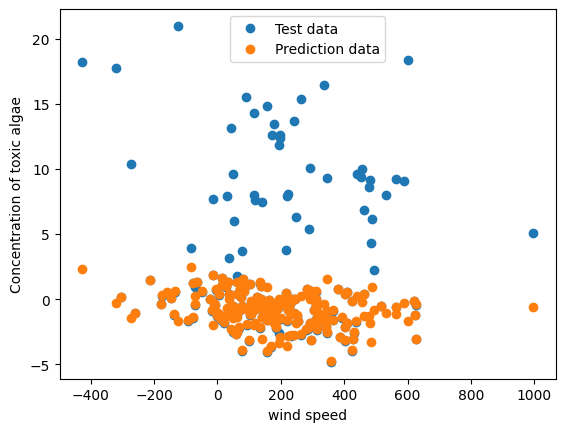

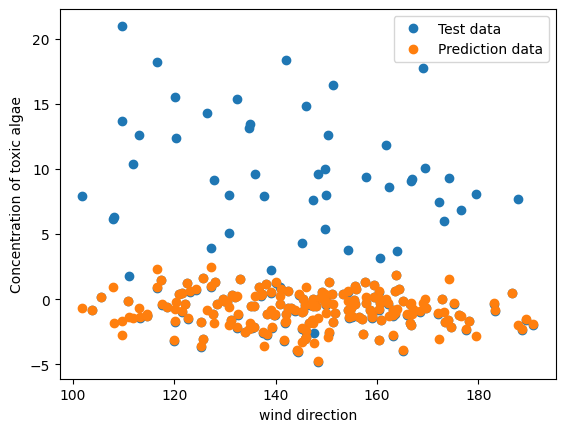

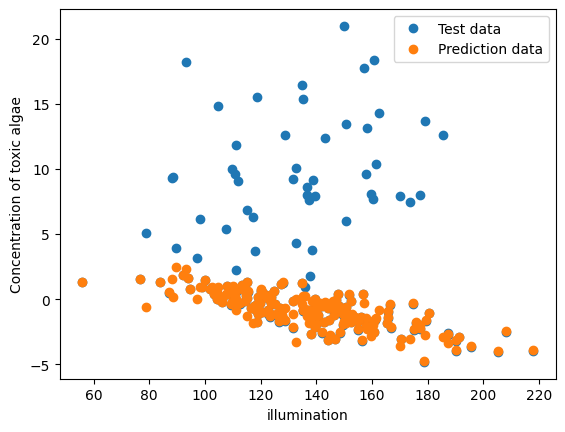

In [35]:
for i in range(5):
    plot = plt.figure(i)
    plt.plot(testX[:,i], dataY, 'o')
    plt.plot(testX[:,i], predY_RANSACRegressor, 'o')
    plt.xlabel(parameters[i])
    plt.ylabel("Concentration of toxic algae")
    plt.legend(["Test data", "Prediction data"])

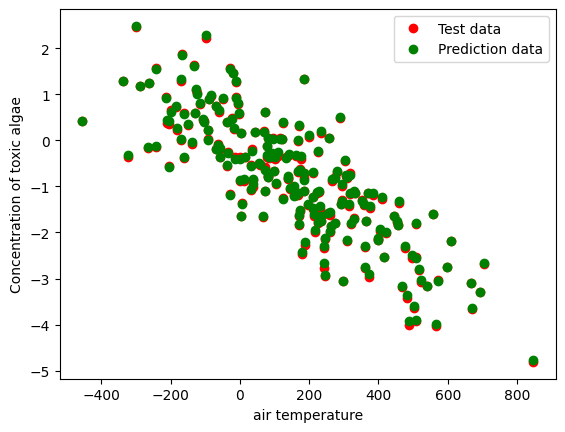

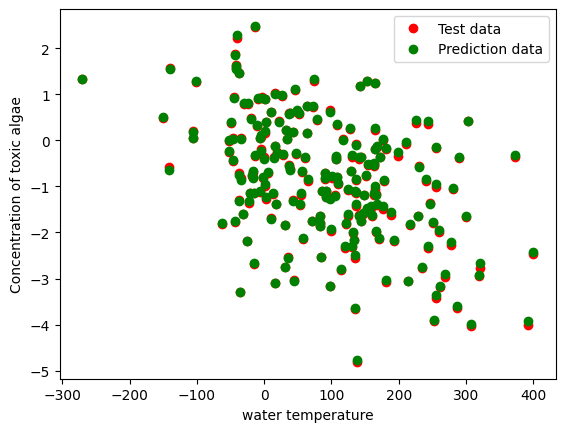

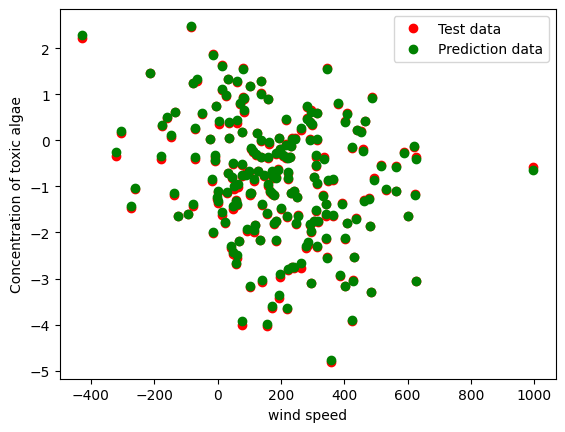

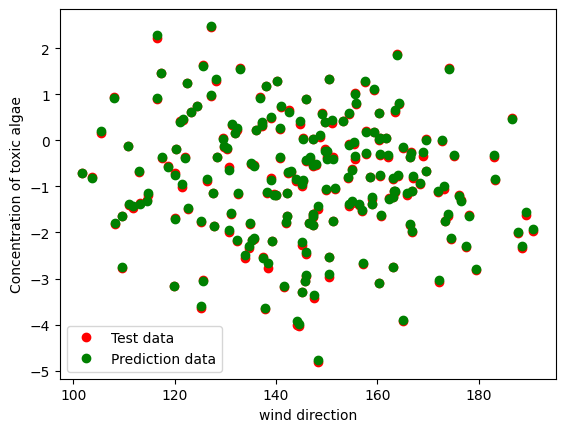

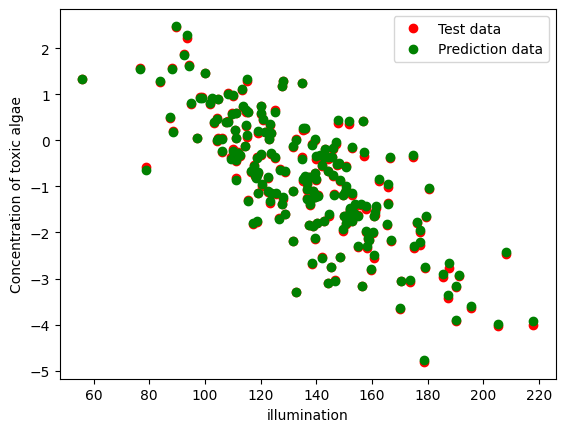

In [37]:
for i in range(5):
    plot = plt.figure(i)
    plt.plot(testX[:,i], predY_HuberRegressor, 'ro')
    #plt.plot(testX[:,i], predY_TheilSenRegressor, 'bo')
    plt.plot(testX[:,i], predY_RANSACRegressor, 'go')
    plt.xlabel(parameters[i])
    plt.ylabel("Concentration of toxic algae")
    plt.legend(["Test data", "Prediction data"])

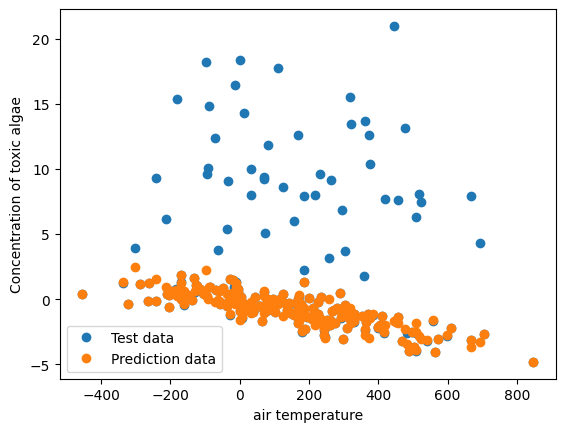

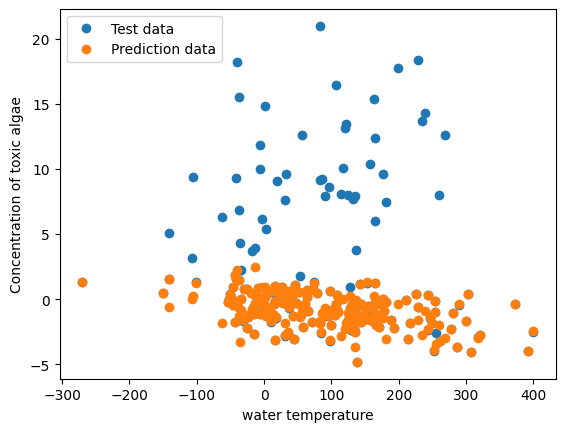

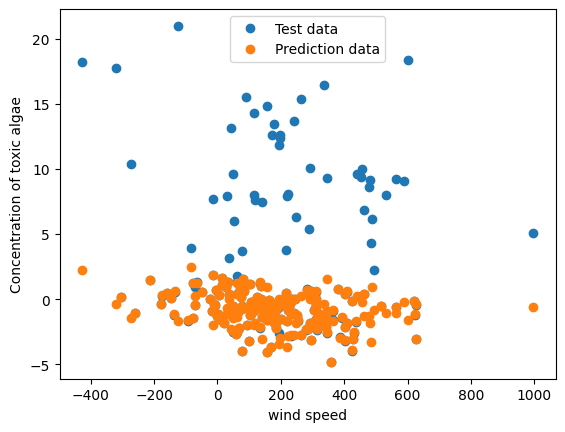

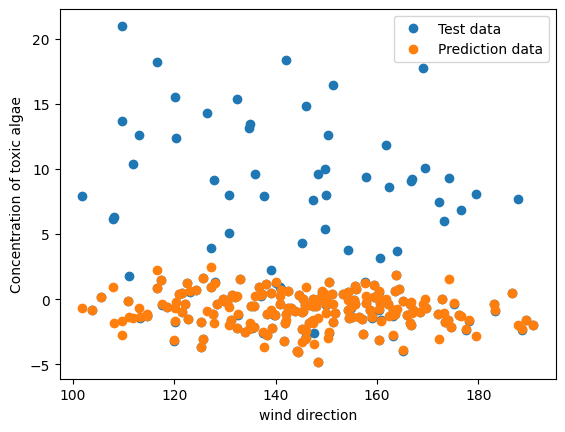

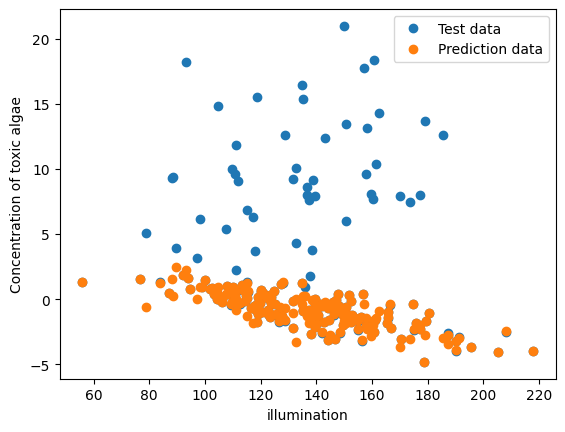

In [25]:
for i in range(5):
    plot = plt.figure(i)
    plt.plot(testX[:,i], dataY, 'o')
    plt.plot(testX[:,i], predY_HuberRegressor, 'o')
    plt.xlabel(parameters[i])
    plt.ylabel("Concentration of toxic algae")
    plt.legend(["Test data", "Prediction data"])